# Homework 2: Univariate Statistics

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 60 pt: Homework questions. 

## 0. Download the data from: 

* [https://www.kaggle.com/mylesoneill/world-university-rankings](https://www.kaggle.com/mylesoneill/world-university-rankings)

There are three rankings of universities included in the dataset: Center for World University Rankings (*CWUR*), Times Higher Education World University Rankings (*Times*), and Academic Ranking of World Universities (ARWU, or *Shanghai*).

Look at the column descriptions on the Kaggle page. Note that for some columns, there may be some missing values or values that may need some munging in order for your analysis to succeed. **Be sure to look at the values in the columns you work with using `describe()`**—if data are missing or nonsensical, this may suggest that you need to take extra steps to read them in properly.

In [185]:
MY_UNIQNAME = 'yuqin'

## 1. Answer the questions below. 
- Write your Python code that can answer the following questions, and
- Explain your answers in plain English. 

### For 10 Points: Compare the distributions of the scores across the three rankings

* Plot histograms and boxplots (or any other plots that you think to be helpful) for the overall scores for the CWUR, Times, and Shanghai rankings. What can you say about them?

In [270]:
# Read the tables from the csv file
import numpy as np
import pandas as pd

%matplotlib inline
cwur = pd.read_csv("data/world-university-rankings/cwurData.csv")
shanghai = pd.read_csv("data/world-university-rankings/shanghaiData.csv")
times = pd.read_csv("data/world-university-rankings/timesData.csv")

In [271]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
def multiplePlots( series ):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 8 Text xticklabel objects>)

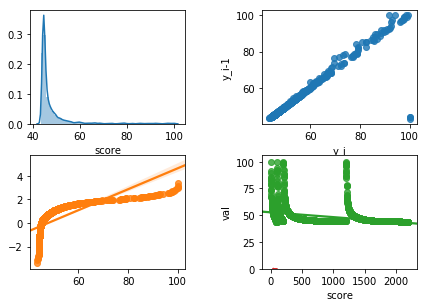

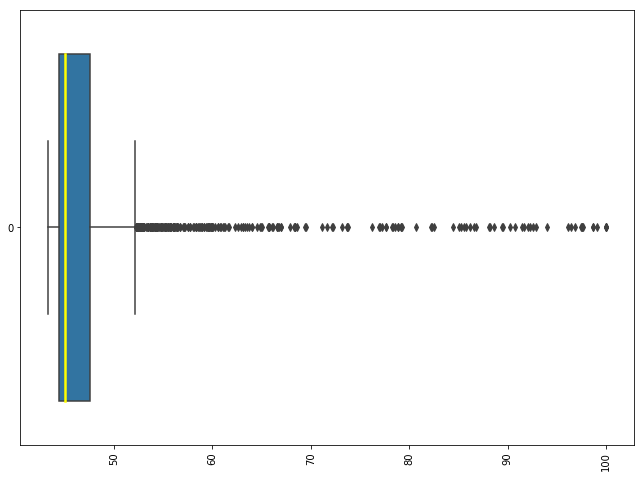

In [188]:
cwur_score = cwur['score']
multiplePlots(cwur_score)

sns.distplot(cwur_score, kde=True)
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
medianprops = dict( linewidth=2.5, color='yellow')
sns.boxplot(medianprops=medianprops,data=cwur_score,orient='h') # orient = v
plt.xticks(rotation=90)

Explain: Cwur ranking appears to be drawn from a right Skewed Distribution. A histogram of the data shows the peak of the data is on the right side of the diagram. The QQ plot shows that the data spread down the line.

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([ 20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
 <a list of 10 Text xticklabel objects>)

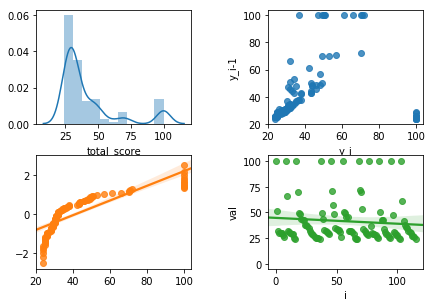

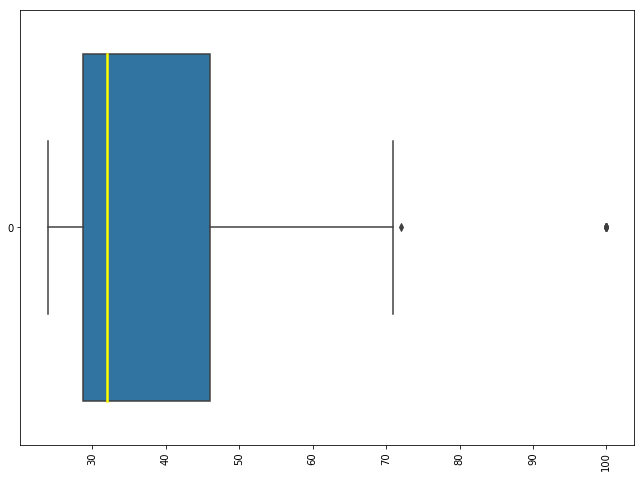

In [189]:
shanghai_score = shanghai[shanghai.total_score.isin(range(0,101))]
shanghai_score = shanghai_score['total_score']                                                   
multiplePlots(shanghai_score)
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
medianprops = dict( linewidth=2.5, color='yellow')
sns.boxplot(medianprops=medianprops,data=shanghai_score,orient='h') # orient = v
plt.xticks(rotation=90)

Shanghai ranking appears to be drawn from a Bimodal distribution. The histogram of the data and the sequence show that there are two peaks. From the box plot, we can tell it also appears to be a right Skewed distribution.

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([ 30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 8 Text xticklabel objects>)

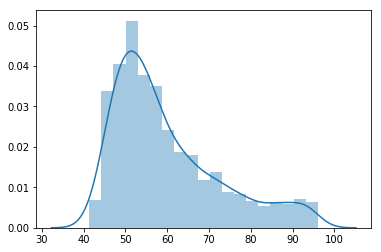

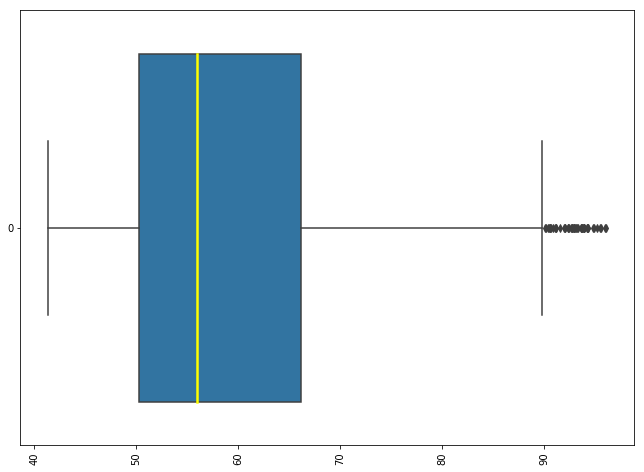

In [190]:
times_score = times[times.total_score != '-']
times_score = times_score['total_score']
score = []
for university in times_score:
    score.append(float(university))


sns.distplot(score, kde=True)
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
medianprops = dict( linewidth=2.5, color='yellow')
sns.boxplot(medianprops=medianprops,data=score,orient='h') # orient = v
plt.xticks(rotation=90)

Explain: Times ranking appears to be drawn from a right Skewed Distribution. A histogram of the data and the box plot shows the peak of the data is on the right side of the diagram.

### For 10 Points: Using the Times data, look at the number of students (`num_students` column) for all universities in 2015.

* Plot the distribution using the `multiplePlots` function from Lab 3. What does it look like?
* Compare the mean and median. Are they similar or different, and why?
* Which school has the most students?

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


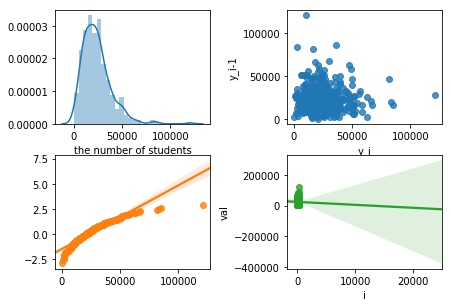

In [191]:
# Plot the distribution using the multiplePlots function from Lab 3. What does it look like?

from pandas import Series

times_2015 = times[times.year == 2015]
student_number = times_2015['num_students']
format_number = []
for number in student_number:
    if type(number)is str:
        number_list = number.split(",")
        if len(number_list) == 2:
            number = int(number_list[0])*1000 + int(number_list[1])
            format_number.append(number)
        else:
            number = int(number_list[0])
            format_number.append(number)
format_number = Series(format_number,name='the number of students')            
multiplePlots(format_number)

Explain: the data of the number of students appears to be drawn from a right Skewed Distributio with mean 23638.576923076922 and median 21086.5. A histogram of the data shows the peak of the data is on the right side of the diagram. The QQ plot shows that the data spread down the line.

In [192]:
# Compare the mean and median. Are they similar or different, and why?
import numpy as np
mean = np.mean(format_number)
median = np.median(format_number)
# mean = format_number.mean()
# median = format_number.median()
print (mean, median)

23638.576923076922 21086.5


Explain: Mean is 23638.58 and median is 21086.5. We can tell the mean is larger than the median because the distribution of the data is right-drifting, which we can see from the plots.

In [193]:
# Which school has the most students?
from pandas import DataFrame

data = dict(zip(times_2015['university_name'],format_number))
school = Series(data = data,name='students_num') 
school_num = school.to_frame()
print(school_num.sort_values('students_num').tail(1))

                students_num
Koç University        120986


Explain: Koc University has the most students, which is 120986.

### For 10 points: Using the Times data, compare the international outlook scores (`international` column) for universities in the US versus universities outside the US.

* Plot their distributions for 2011 and describe them. Identify their their mean and median.
* Repeat this for 2016. Has the result changed?

The mean and median of the international outlook scores for the universities in the US in 2011: 
mean:  42.23055555555556 median:  38.6
The mean and median of the international outlook scores for the universities in the non-US in 2011: 
mean:  61.502521008403356 median:  63.2


/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


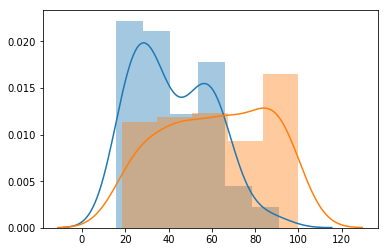

In [194]:
# 2011 
times_2011 = times[times.year == 2011]

# US
us_score_2011 = times_2011[times_2011.country == 'United States of America']['international']
us_score = []
for score in us_score_2011:
    if score != '-':
        us_score.append(float(score))
us_mean = np.mean(us_score)
us_median = np.median(us_score)
print('The mean and median of the international outlook scores for the universities in the US in 2011: ')
print('mean: ',us_mean,'median: ',us_median)
sns.distplot(us_score, kde=True)

# Non US
nonus_score_2011 = times_2011[times_2011.country != 'United States of America']['international']
nonus_score = []
for score in nonus_score_2011:
    if score != '-':
        nonus_score.append(float(score))
nonus_mean = np.mean(nonus_score)
nonus_median = np.median(nonus_score)
print('The mean and median of the international outlook scores for the universities in the non-US in 2011: ')
print('mean: ',nonus_mean,'median: ',nonus_median)
sns.distplot(nonus_score, kde=True)

Explain: we can tell from the plot, in 2011, the outlook scores of US universities are higher than that of the universities outside the US when the score is below around 70, and lower when the score is above around 70.

The mean and median of the international outlook scores for the universities in the US in 2016: 
mean:  42.43150684931507 median:  40.2
The mean and median of the international outlook scores for the universities in the non-US in 2016: 
mean:  49.855198776758414 median:  47.0


/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


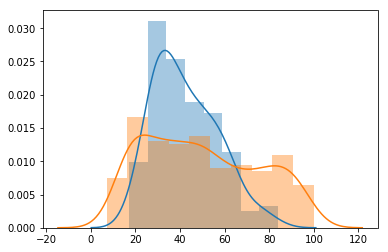

In [195]:
# 2016
times_2016 = times[times.year == 2016]

# US
us_score_2016 = times_2016[times_2016.country == 'United States of America']['international']
us_score = []
for score in us_score_2016:
    if score != '-':
        us_score.append(float(score))
us_mean = np.mean(us_score)
us_median = np.median(us_score)
print('The mean and median of the international outlook scores for the universities in the US in 2016: ')
print('mean: ',us_mean,'median: ',us_median)
sns.distplot(us_score, kde=True)

# Non US
nonus_score_2016 = times_2016[times_2016.country != 'United States of America']['international']
nonus_score = []
for score in nonus_score_2016:
    if score != '-':
        nonus_score.append(float(score))
nonus_mean = np.mean(nonus_score)
nonus_median = np.median(nonus_score)
print('The mean and median of the international outlook scores for the universities in the non-US in 2016: ')
print('mean: ',nonus_mean,'median: ',nonus_median)
sns.distplot(nonus_score, kde=True)

Explain: we can tell from the plot, in 2016, the outlook scores of US universities are overall higher than that of the universities outside the US.

(Use this space to explain your answers)

### For 10 Points: Using the data for the CWUR rankings, investigate how the rankings change over time.

* Which universities consistently appear in the rankings, and which aren't?
* Which universities are rising, falling, or stationary in rank over the years?
* Plot the results, and explain your answers

It might be more intuitive to compare the scores rather than the ranks directly. Feel free to do this if it's the case.

In [344]:
# Which universities consistently appear in the rankings, and which aren't?
# Plot the results, and explain your answers
four_years_uni = []
consistent_uni = []
inconsistent_uni = []
size = []
for institution in cwur['institution']:
    count = 0
    for i in cwur['institution']:
        if i == institution:
            count += 1
    if count == 1:
        inconsistent_uni.append(institution)
    if count > 1:
        consistent_uni.append(institution)
        if count == 4:
            four_years_uni.append(institution)

print("The universities are consistently appearing in the rankings: see the comment" )
# print(consistent_uni)

print("The universities aren't consistently appearing in the rankings: see the comment ")
# print(inconsistent_uni)

The universities are consistently appearing in the rankings: see the comment
The universities aren't consistently appearing in the rankings: see the comment 


Explain: In the consistent_uni, I listed all universities are consistently appearing in the rankings, which in other words, those universities show up more than once in the rankings. In the inconsistent_uni, I listed all universities that show up only once in the rankings.

In [345]:
# Which universities are rising, falling, or stationary in rank over the years?
# Plot the results, and explain your answers
%matplotlib inline
uni_score = []
for uni in cwur['institution']:
    score = cwur[cwur['institution']== uni].score
    uni_score.append(score)
data = dict(zip(cwur['institution'],uni_score))

rising_uni = []
stationary_uni = []
falling_uni = []
for k,v in data.items():
    if len(v)==4:
        if v.values[0]<=v.values[1] and v.values[1]<=v.values[2] and v.values[2]<=v.values[3]:
            if v.values[0]==v.values[1] and v.values[1]==v.values[2] and v.values[2]==v.values[3]:
                stationary_uni.append(k)
            else:
                rising_uni.append(k)
        if v.values[0]>v.values[1] and v.values[1]>=v.values[2] and v.values[2]>=v.values[3]:
            falling_uni.append(k)
print('stationary:',stationary_uni)
print('rising:',rising_uni)
print('falling:',falling_uni)
# cwur.groupby(['institution'])['score'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(18,8))


stationary: ['Harvard University']
rising: ['Cornell University', 'University College London', 'Northwestern University', 'University of Michigan, Ann Arbor', 'University of Washington - Seattle', 'University of Colorado Boulder', 'University of Oslo', 'University of Sydney', 'University of Texas MD Anderson Cancer Center']
falling: []


Explain: I investigated the universities that keep showing in the rankings from 2012 to 2015. 
Harvard University is the only university that get the consistent score through four years.
In the rising list, I listed all universities of which scores keep rising through four years.
There is no univeristy that keep falling its score through four years.

### For 10 Points: Using the education expenditure data, identify the nations that spent below the average of the OECD for Higher Education Institutions in 2000, but above the average in 2010.

* Sort the nations by difference between 2000 and 2010
* Plot the lag, and explain your answers.

OECD Average 1.0 1.1
France 1.0 1.3
Iceland 0.8 1.1
Netherlands 1.0 1.3
Spain 0.9 1.1


Text(0.5,0,'y_i')

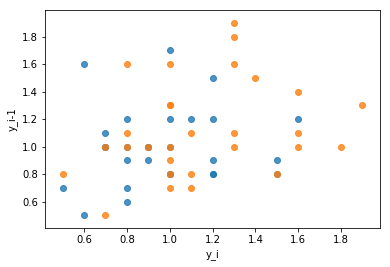

In [342]:
# read the file
expenditure = pd.read_csv("data/world-university-rankings/education_expenditure_supplementary_data.csv",engine='python')

# calculate the average
higher_education = expenditure[expenditure.institute_type == 'Higher Education Institutions ']
OECD_avg = higher_education[higher_education.country == 'OECD Average']
avg_2000 = OECD_avg['2000'].values[0]
avg_2010 = OECD_avg['2010'].values[0]

expenditure_2000 = []
expenditure_2010 = []
for country in higher_education.country.unique():
    country_2000 = higher_education[higher_education.country == country]['2000'].values[0]
    country_2010 = higher_education[higher_education.country == country]['2010'].values[0]
    expenditure_2000.append(country_2000)
    expenditure_2010.append(country_2010)
    if country_2000 <= avg_2000 and country_2010 >= avg_2010 :
        print(country,country_2000,country_2010)

#plot
lag = higher_education['2000'].copy()
lag = lag[:-1]
current = higher_education['2000'][1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

lag = higher_education['2010'].copy()
lag = lag[:-1]
current = higher_education['2010'][1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

Explain: the nations that spent below the average of the OECD for Higher Education Institutions in 2000, but above the average in 2010 are France, Iceland, Netherlands and Spain. The blue dots represent the year of 2000 while the orange dots represent the year of 2010. We can see the lag is clustered in the left-down corner of the plot.

### For 10 Points: Using the Times ranking, look at how the Female : Male ratio (`female_male_ratio` column) changes over time.

What were the distributions like in the year 2011 and 2016? How have these distributions changed?

You may want to convert the column values to an easier-to-understand measure, such as a percentage or the ratio of female students (the first numeric value in the ratio entry).

/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


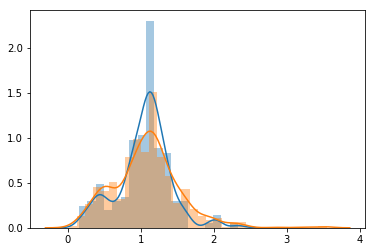

In [267]:
# 2011
times_2011 = times[times.year == 2011]
ratio_2011 = times_2011.female_male_ratio
ratio_list_2011 = []
for ratio in ratio_2011:
    if type(ratio) == str:
        ratio = ratio.split(':')
        num_ratio = int(ratio[0])/int(ratio[1])
        ratio_list_2011.append(num_ratio)
sns.distplot(ratio_list_2011, kde=True)

# 2016
times_2016 = times[times.year == 2016]
ratio_2016 = times_2016.female_male_ratio
ratio_list_2016 = []
for ratio in ratio_2016:
    if type(ratio) == str:
        ratio = ratio.split(':')
        if len(ratio) == 2:
            if int(ratio[1]) != 0:
                num_ratio = int(ratio[0])/int(ratio[1])
                ratio_list_2016.append(num_ratio)
sns.distplot(ratio_list_2016, kde=True)

Explain: we can tell from the plot, the distributions of female_male_ratio between 2011 and 2016 are similar but the mean of the ratio is reduced from 2011 to 2016 and is close to 1.0.

### *Bonus* – For 5 Points: Which, if any, of the rankings from the Kaggle data set support the claims made in [this Times Higher Education article on public schools](https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states)?

Justify your claim with specific examples or data.

In [ ]:
# put your code here

(Use this space to explain your answers)